In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("Facebook.csv",delimiter=';')
df

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [3]:
df.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

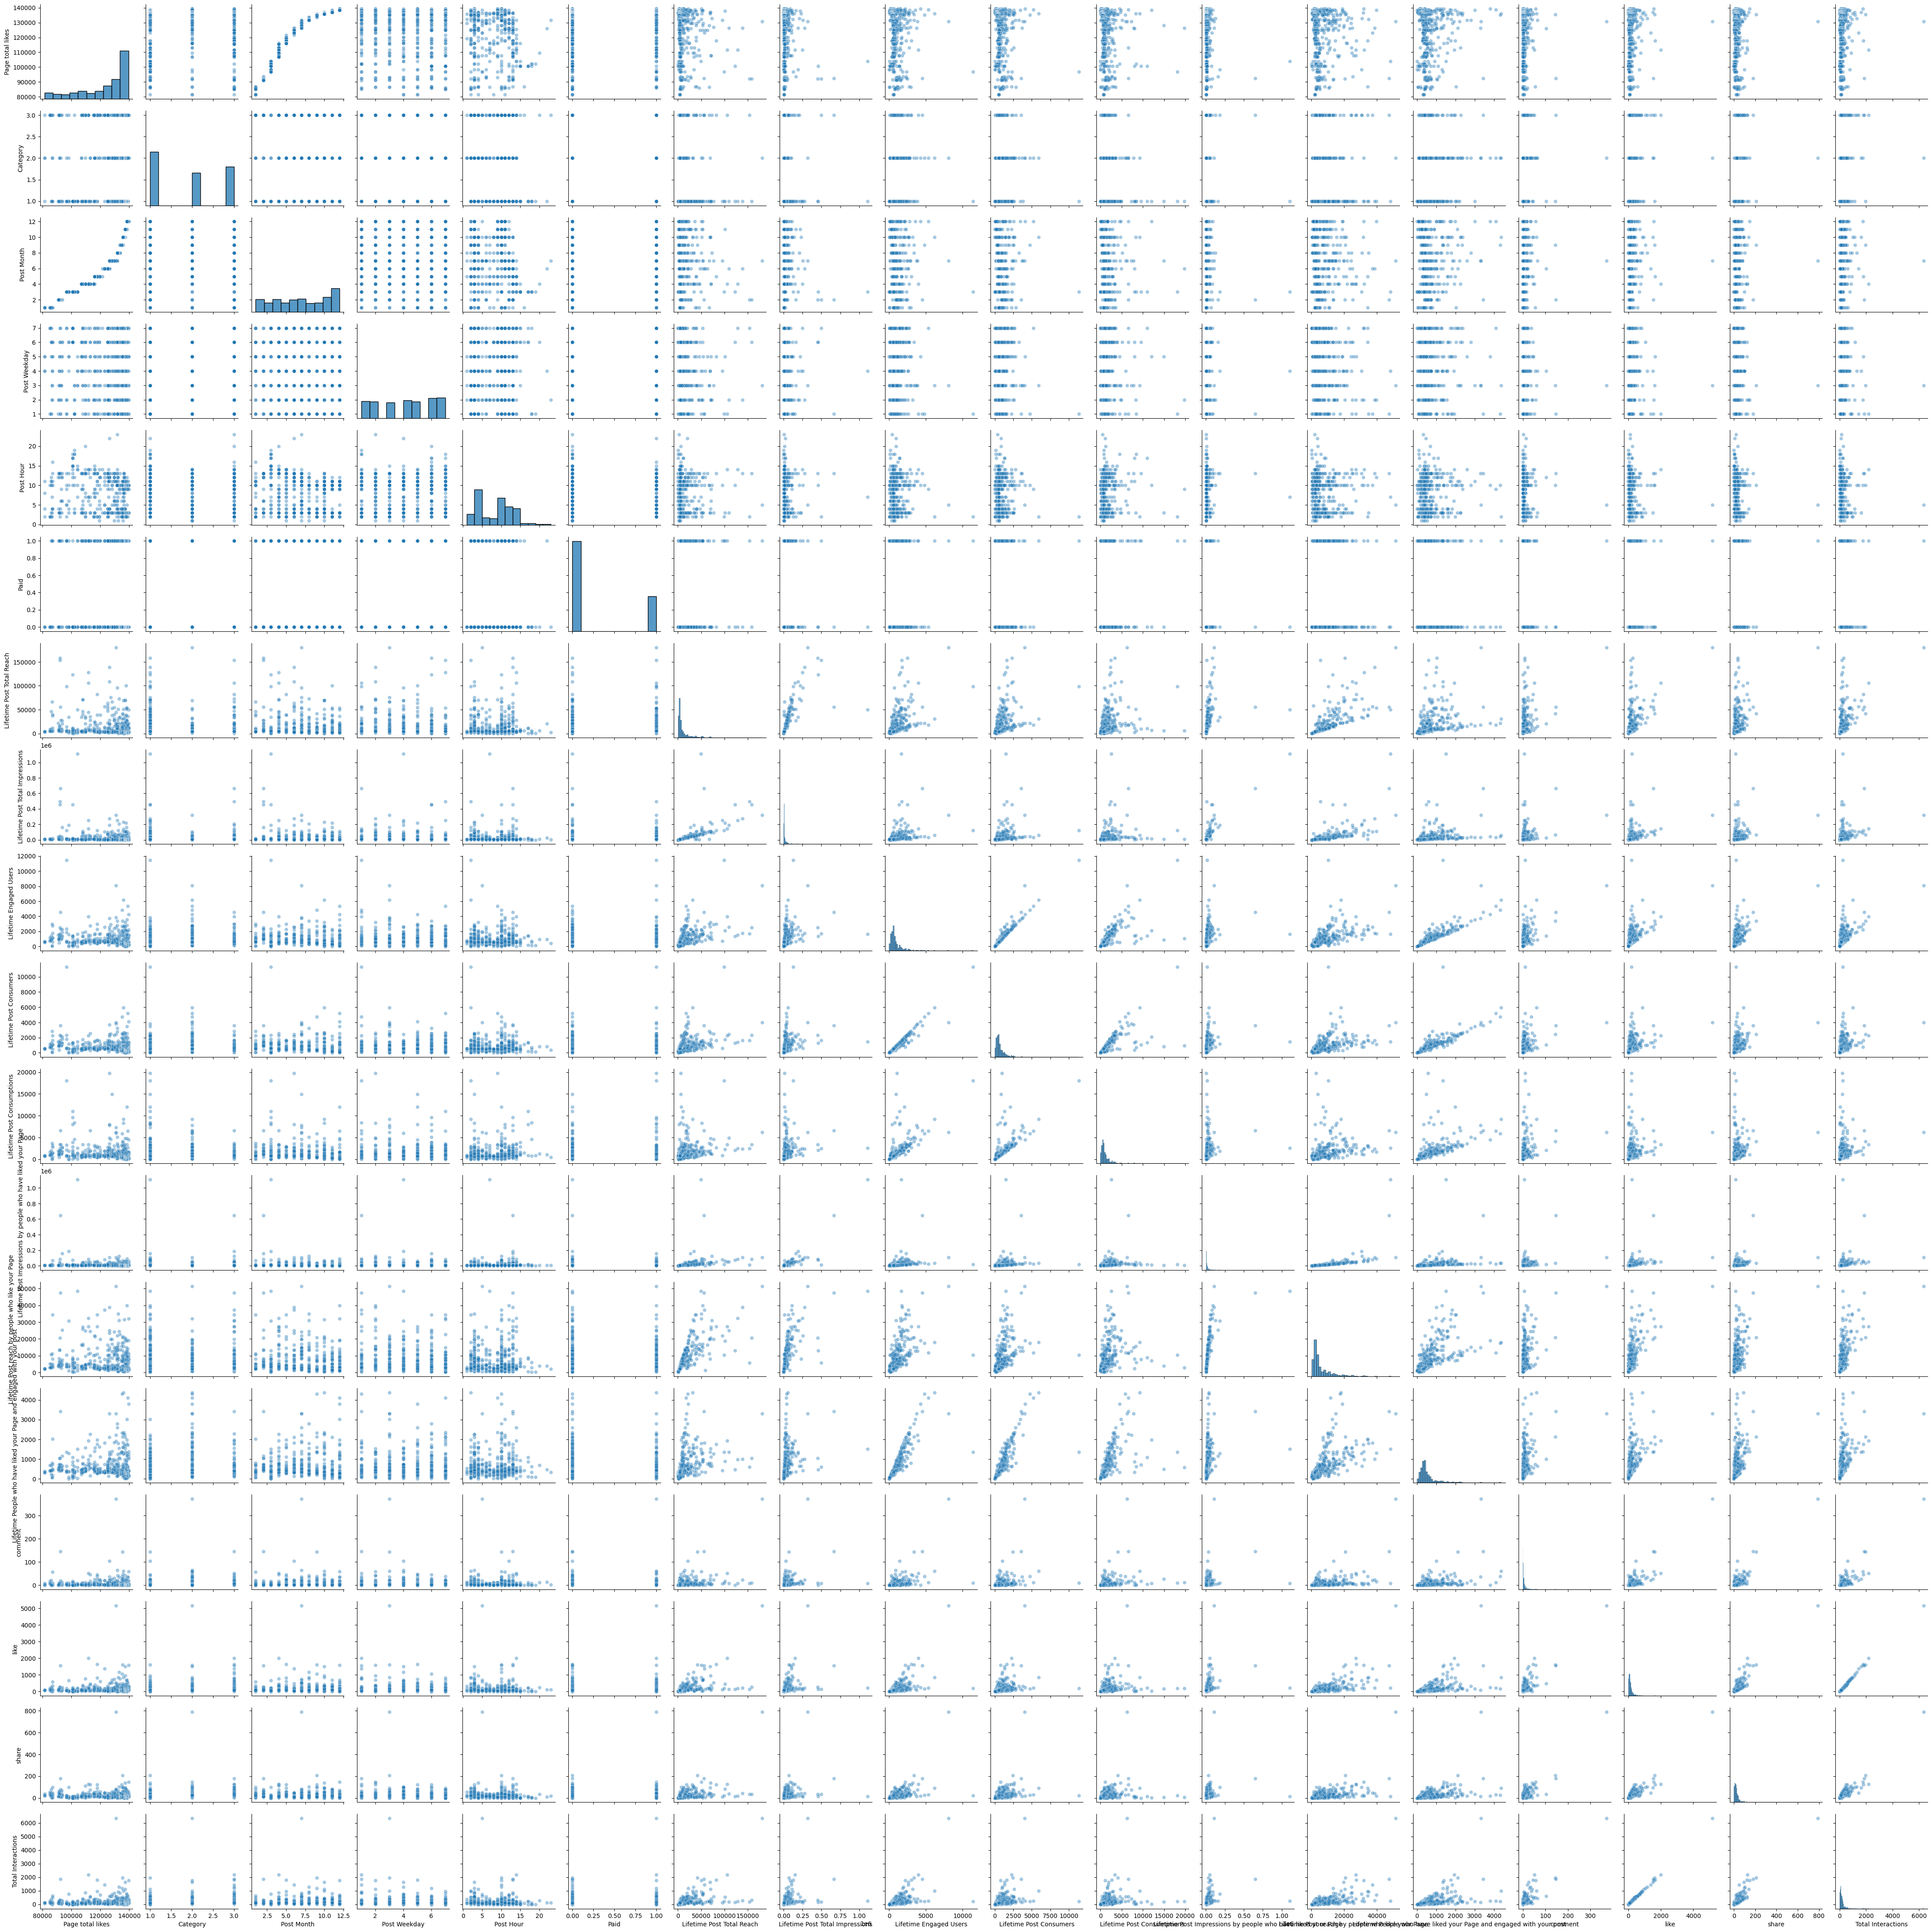

In [4]:
sns.pairplot(df, kind="scatter", plot_kws={'alpha':0.4})

In [5]:
df.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [12]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()


X = df[numeric_columns]


print("X (numeric features):")
print(X.head())


y = df['Total Interactions']  

print("\ny (target):")
print(y.head())


X (numeric features):
   Page total likes  Category  Post Month  Post Weekday  Post Hour  Paid  \
0            139441         2          12             4          3   0.0   
1            139441         2          12             3         10   0.0   
2            139441         3          12             3          3   0.0   
3            139441         2          12             2         10   1.0   
4            139441         2          12             2          3   0.0   

   Lifetime Post Total Reach  Lifetime Post Total Impressions  \
0                       2752                             5091   
1                      10460                            19057   
2                       2413                             4373   
3                      50128                            87991   
4                       7244                            13594   

   Lifetime Engaged Users  Lifetime Post Consumers  \
0                     178                      109   
1                    1

In [37]:
numeric_columns

['Page total likes',
 'Category',
 'Post Month',
 'Post Weekday',
 'Post Hour',
 'Paid',
 'Lifetime Post Total Reach',
 'Lifetime Post Total Impressions',
 'Lifetime Engaged Users',
 'Lifetime Post Consumers',
 'Lifetime Post Consumptions',
 'Lifetime Post Impressions by people who have liked your Page',
 'Lifetime Post reach by people who like your Page',
 'Lifetime People who have liked your Page and engaged with your post',
 'comment',
 'like',
 'share',
 'Total Interactions']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [28]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print (mse_linear)
print(r2_linear)

1.631468057072623e-24
1.0


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print (mse_gb)
print(r2_gb)

950.213006269065
0.9908389612363647


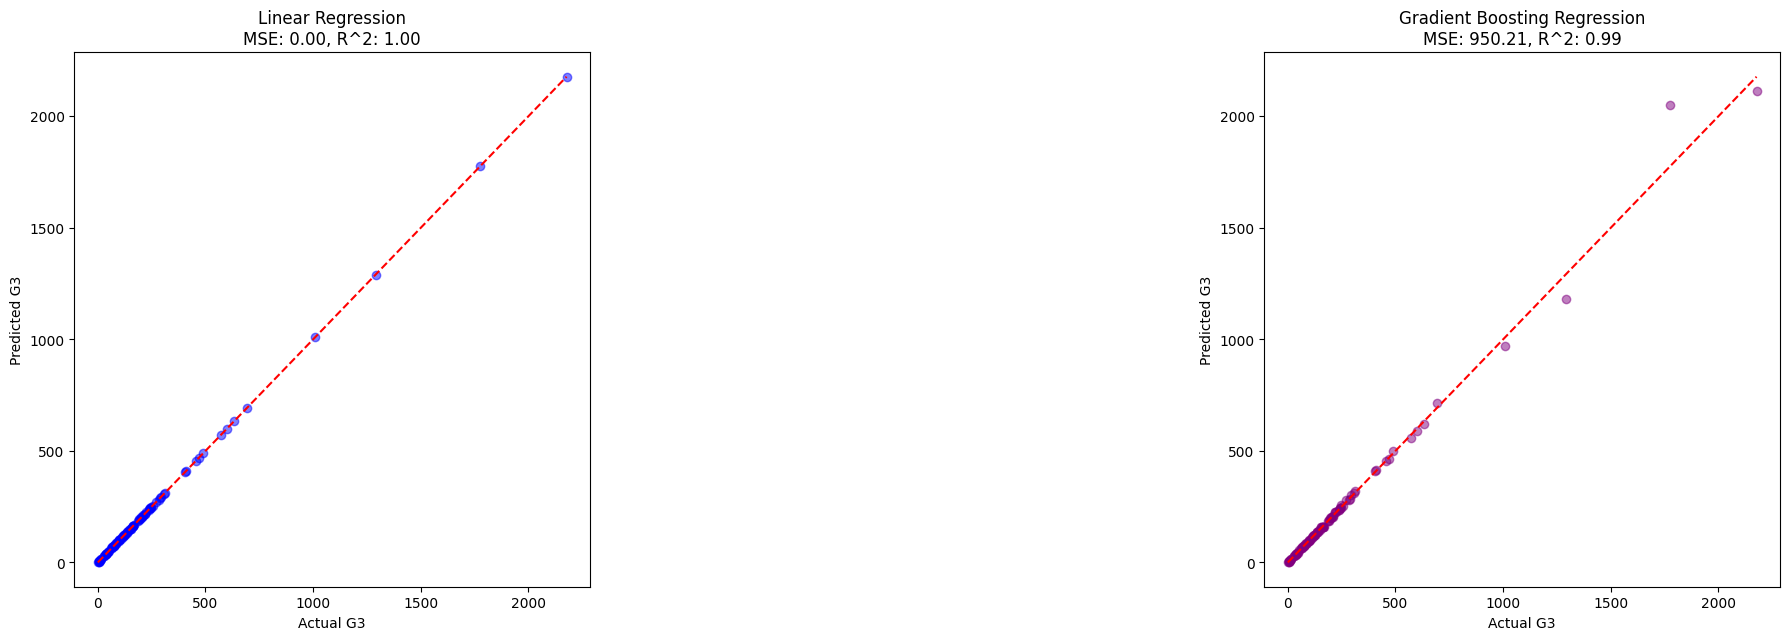

In [40]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Linear Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_linear, r2_linear))

plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_gb, color='purple', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Gradient Boosting Regression\nMSE: {:.2f}, R^2: {:.2f}'.format(mse_gb, r2_gb))


plt.tight_layout()
plt.show()

In [33]:
models = {
    'Linear Regression': (mse_linear, r2_linear, y_pred_linear),
    'Gradient Boosting Regression': (mse_gb, r2_gb, y_pred_gb)
}

best_model_name = min(models, key=lambda x: (models[x][0], -models[x][1]))

best_mse, best_r2, best_predictions = models[best_model_name]

print(f"The best model is: {best_model_name} (MSE: {best_mse:.2f}, R^2: {best_r2:.2f})")

The best model is: Linear Regression (MSE: 0.00, R^2: 1.00)


In [36]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
print( results)

     Actual  Predicted
117       7        7.0
352     255      255.0
214     470      470.0
431       4        4.0
479     127      127.0
..      ...        ...
160     409      409.0
389      44       44.0
295      66       66.0
220      96       96.0
455     217      217.0

[99 rows x 2 columns]
